In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp



In [127]:
# câu 1:
import cvxpy as cp
import numpy as np

A = np.array([
    [1, 0],
    [0, 1],
    [12, 9]
], dtype=float)

b = np.array([45, 80, 900], dtype=float)
c = np.array([-250000, -180000], dtype=float)  # vì minimize


x = cp.Variable(2, nonneg=True)  # [x1, x2] >= 0

objective = cp.Minimize(c @ x)       # minimize (-P)
constraints = [A @ x <= b]           # Ax <= b

problem = cp.Problem(objective, constraints)
problem.solve()

print("x1 =", x.value[0])
print("x2 =", x.value[1])
print("Lợi nhuận tối đa =", -problem.value)


x1 = 44.99999993074473
x2 = 40.000000090941306
Lợi nhuận tối đa = 18449999.999055617


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# ==============================
# DỮ LIỆU BÀI TOÁN
# ==============================
A = np.array([[1, 0], [0, -2]])
b = np.array([2, 4])

# Hàm mục tiêu
def f(x):
    x1, x2 = x
    return np.exp(2*x1) + 0.5 * ((x1 - 2)**2 + (-2*x2 - 4)**2)

# Gradient
def grad_f(x):
    x1, x2 = x
    df_dx1 = 2*np.exp(2*x1) + (x1 - 2)
    df_dx2 = 4*x2 + 8
    return np.array([df_dx1, df_dx2])

# ==============================
# a) TÌM ĐIỂM TỐI ƯU CHÍNH XÁC
# ==============================
def eq_x1(x1):
    return 2*np.exp(2*x1) + (x1 - 2)

x1_star = fsolve(eq_x1, 0)[0]
x2_star = -2
x_star = np.array([x1_star, x2_star])
p_star = f(x_star)

print("Điểm tối ưu x* =", x_star)
print("Giá trị tối ưu p* =", p_star)

# ==============================
# b) THUẬT TOÁN GRADIENT DESCENT
# ==============================
def gradient_descent(learning_rate, max_iter,x_init):
    x = x_init
    x_values = [x]
    f_values = [f(x)]
    for k in range(max_iter):
        
        x =x -  learning_rate * grad_f(x)
        x_values.append(x)
        f_values.append(f(x))
        print(f'lần lặp thứ {i+1}: x = {x_values[-1]}, f(x) = {f_values[-1]}')
    return x_values,f_values

x0 = np.array([-3.0, 5.0])

# Hai learning rate
learning_rate1 = 2/5
learning_rate2 = 1/2
max_vongLap = 100
print('learning rate = 2/5')
x_values_1, f_values_1 = gradient_descent(learning_rate1,max_vongLap,x0)
print('=============' *10)
print('learning rate = 1/2')
x_values_2, f_values_2 = gradient_descent(learning_rate2,max_vongLap,x0)






Điểm tối ưu x* = [ 0. -2.]
Giá trị tối ưu p* = 3.0
learning rate = 2/5
lần lặp thứ 100: x = [-1.001983 -6.2     ], f(x) = 39.92075057735501
lần lặp thứ 100: x = [0.09097051 0.52      ], f(x) = 15.722540241608963
lần lặp thứ 100: x = [-0.10505245 -3.512     ], f(x) = 7.598410130547686
lần lặp thứ 100: x = [ 0.08856916 -1.0928    ], f(x) = 4.66660381395919
lần lặp thứ 100: x = [-0.10189547 -2.54432   ], f(x) = 3.617183675622657
lần lặp thứ 100: x = [ 0.08635642 -1.673408  ], f(x) = 3.2328653034626402
lần lặp thứ 100: x = [-0.09900595 -2.1959552 ], f(x) = 3.1000699626452084
lần lặp thứ 100: x = [ 0.08430836 -1.88242688], f(x) = 3.0462504833899042
lần lặp thứ 100: x = [-0.09634809 -2.07054387], f(x) = 3.0320230373229626
lần lặp thứ 100: x = [ 0.08240514 -1.95767368], f(x) = 3.021337443320407
lần lặp thứ 100: x = [-0.09389242 -2.02539579], f(x) = 3.022275637789714
lần lặp thứ 100: x = [ 0.08063014 -1.98476252], f(x) = 3.0174454468034595
lần lặp thứ 100: x = [-0.09161452 -2.00914249], f(x) =

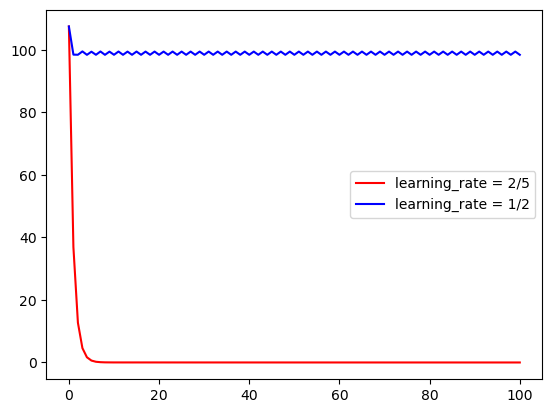

In [115]:
saiSo1  = [abs(f-p_star) for f in f_values_1]
saiSo2  = [abs(f-p_star) for f in f_values_2]


plt.plot(saiSo1,color = 'r',label = 'learning_rate = 2/5')
plt.plot(saiSo2,color = 'b',label = 'learning_rate = 1/2' )
plt.legend()
plt.show()

In [116]:
#câu 3

Điểm tối ưu x* = [-1.37160486e+11 -2.10027000e+11 -9.00115737e+10]
Giá trị tối ưu p* = -1418753806617.13


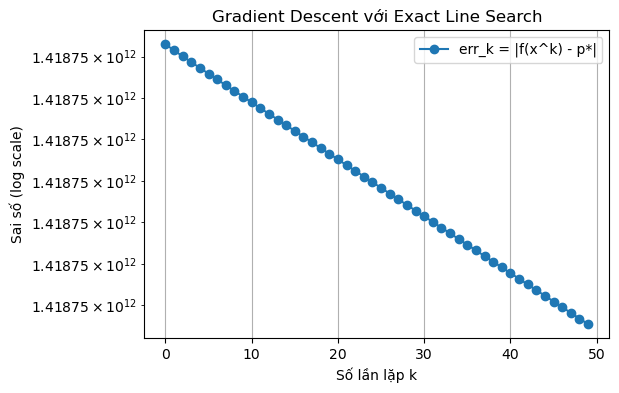

In [132]:
# ======== (1) DỮ LIỆU BÀI TOÁN ========
A = np.array([
    [0, -2, -1, -2],
    [1, -1,  3,  0],
    [1, -1,  2, -5]
])
b = np.array([3, -1, 3, 2])
c = np.array([4, 11/4, 13/4])
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize


# ===== Hàm f(x), ∇f(x) =====
def f(x):
    value = c[0]*x[0] + c[1]*x[1] + c[2]*x[2]
    for i in range(4):  # m = 4
        ai = A[:, i]
        val = b[i] - np.dot(ai, x)
        if val > 0:
            value -= np.log(val)
        else:
            value -= 0  # bỏ qua nếu log âm hoặc 0
    return value

def grad_f(x):
    grad = np.copy(c)
    for i in range(4):
        ai = A[:, i]
        val = b[i] - np.dot(ai, x)
        if val > 0:
            grad += ai / val
        # nếu val <= 0 thì bỏ qua (vì đạo hàm không xác định)
    return grad
# ===== Tìm x* và p* =====
x0 = np.zeros(3)
res = minimize(f, x0, method='BFGS')
x_star = res.x
p_star = f(x_star)

print("Điểm tối ưu x* =", x_star.round(2))
print("Giá trị tối ưu p* =", p_star.round(2))

# ===== Gradient Descent với Exact Line Search =====
def exact_line_search(x, grad):
    func = lambda alpha: f(x - alpha * grad)
    result = minimize_scalar(func, bounds=(0, 1), method='bounded')
    return result.x

x = np.array([-1, 1, 0], dtype=float)
max_iter = 50
errors = []

for k in range(max_iter):
    grad = grad_f(x)
    alpha = exact_line_search(x, grad)
    x = x - alpha * grad
    errors.append(abs(f(x) - p_star))

# ===== Vẽ đồ thị sai số =====
plt.figure(figsize=(6,4))
plt.semilogy(range(len(errors)), errors, 'o-', label='err_k = |f(x^k) - p*|')
plt.xlabel('Số lần lặp k')
plt.ylabel('Sai số (log scale)')
plt.title('Gradient Descent với Exact Line Search')
plt.legend()
plt.grid(True)
plt.show()
